In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sciStat
import sussix


---
# LHC tracking data
---

The following spectra (100 spectral lines each) are from LHC tracking data (No BB, but x-y coupling and strong 450 A arc octupoles). They accurately represent the (x-px),(y-py),(zeta-pzeta) tracjectories for 10k turns and are intended to be used as realistic example trajectories (validated manually).

In [2]:
# PARTICLES ON MOMENTUM
particles_on_p  = []
for file in ['data/LHC_particle_on_momentum_1sigma.csv',
             'data/LHC_particle_on_momentum_3sigma.csv',
             'data/LHC_particle_on_momentum_5sigma.csv']:
    
    # Loading file
    df  = pd.read_csv(file,index_col=0)
    dct = {}
    for plane in ['x','y','zeta']:  

        _df = df[[f'A{plane}',f'Q{plane}']].rename(columns={f'A{plane}':'amplitude',f'Q{plane}':'frequency'}).astype({'amplitude':np.complex128,'frequency':np.float64})

        # Recreating the signal
        nturns = int(1e4)
        z,pz = sussix.analysis.generate_signal(_df.amplitude,_df.frequency,np.arange(int(nturns)))

        # Saving the signal
        dct[f'{plane}']   = z
        dct[f'p{plane}']  = pz
        dct[f'df{plane}'] = _df
    particles_on_p.append(dct)
    

# PARTICLES OFF MOMENTUM
particles_off_p  = []
for file in ['data/LHC_particle_off_momentum_1sigma.csv',
             'data/LHC_particle_off_momentum_3sigma.csv',
             'data/LHC_particle_off_momentum_5sigma.csv']:
    
    # Loading file
    df  = pd.read_csv(file,index_col=0)
    dct = {}
    for plane in ['x','y','zeta']:  

        _df = df[[f'A{plane}',f'Q{plane}']].rename(columns={f'A{plane}':'amplitude',f'Q{plane}':'frequency'}).astype({'amplitude':np.complex128,'frequency':np.float64})

        # Recreating the signal
        nturns = int(1e4)
        z,pz = sussix.analysis.generate_signal(_df.amplitude,_df.frequency,np.arange(int(nturns)))

        # Saving the signal
        dct[f'{plane}']   = z
        dct[f'p{plane}']  = pz
        dct[f'df{plane}'] = _df
    particles_off_p.append(dct)



---
# Plotting the particles
---

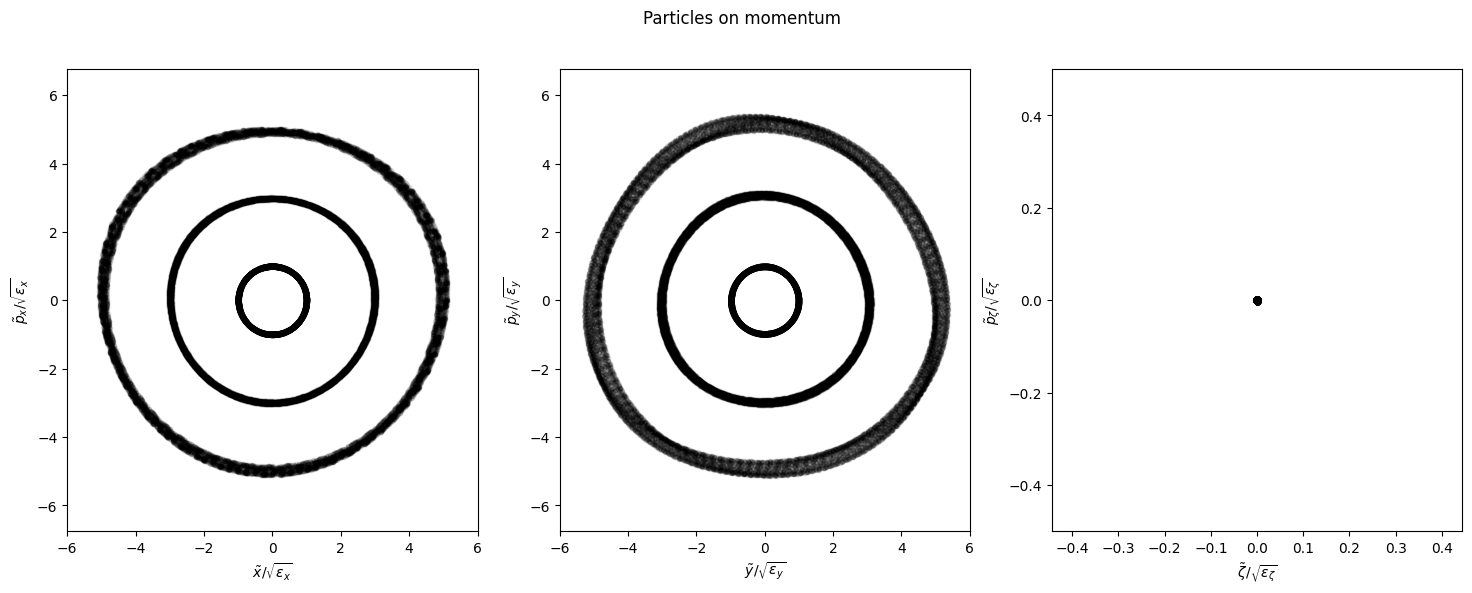

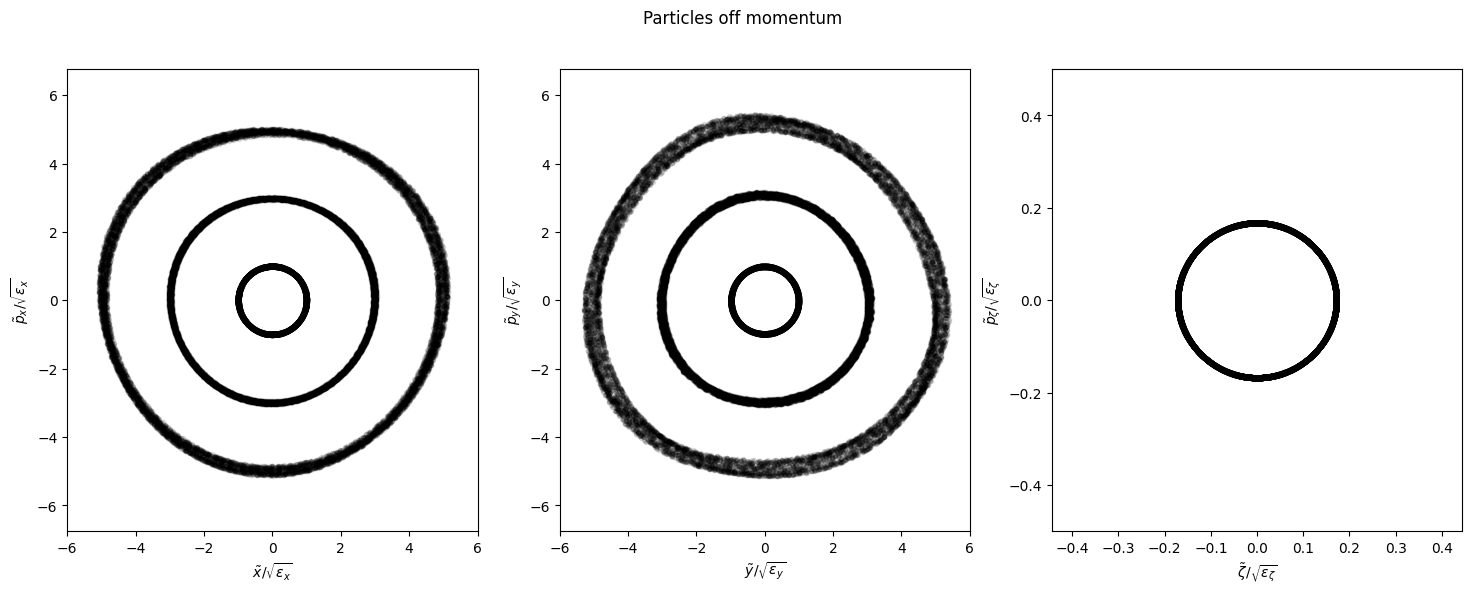

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Particles on momentum')
for part in particles_on_p:
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(part[plane],part[f'p{plane}'],'.',color='k',alpha=0.1)

# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
    
    if plane == '\zeta':
        plt.xlim(-0.5,0.5)
        plt.ylim(-0.5,0.5)
    else:
        plt.xlim(-6,6)
        plt.ylim(-6,6)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Particles off momentum')
for part in particles_off_p:
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(part[plane],part[f'p{plane}'],'.',color='k',alpha=0.1)

# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
    
    if plane == '\zeta':
        plt.xlim(-0.5,0.5)
        plt.ylim(-0.5,0.5)
    else:
        plt.xlim(-6,6)
        plt.ylim(-6,6)


---
# Extracting the tune
---

In [5]:
for part,sigma in zip(particles_on_p,[1,3,5]):
    print(40*'-')
    print(f'Particle @ {sigma} sigma:')
    print(f'x only: {sussix.tune(part["x"],window_order=2)}')
    print(f'x-px  : {sussix.tune(part["x"],part["px"],window_order=2)}')

----------------------------------------
Particle @ 1 sigma:
x only: 0.31002084339096253
x-px  : 0.31002084339096164
----------------------------------------
Particle @ 3 sigma:
x only: 0.3101772486595974
x-px  : 0.31017724865959656
----------------------------------------
Particle @ 5 sigma:
x only: 0.31048671666610134
x-px  : 0.3104867166660991


---
# Full phase space analysis, x-plane
---

(-6.0, 6.0)

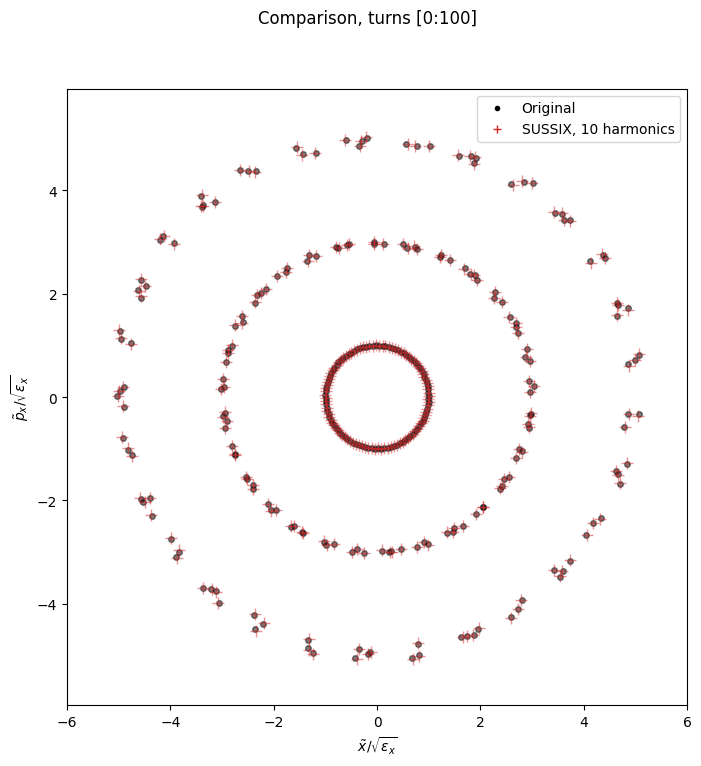

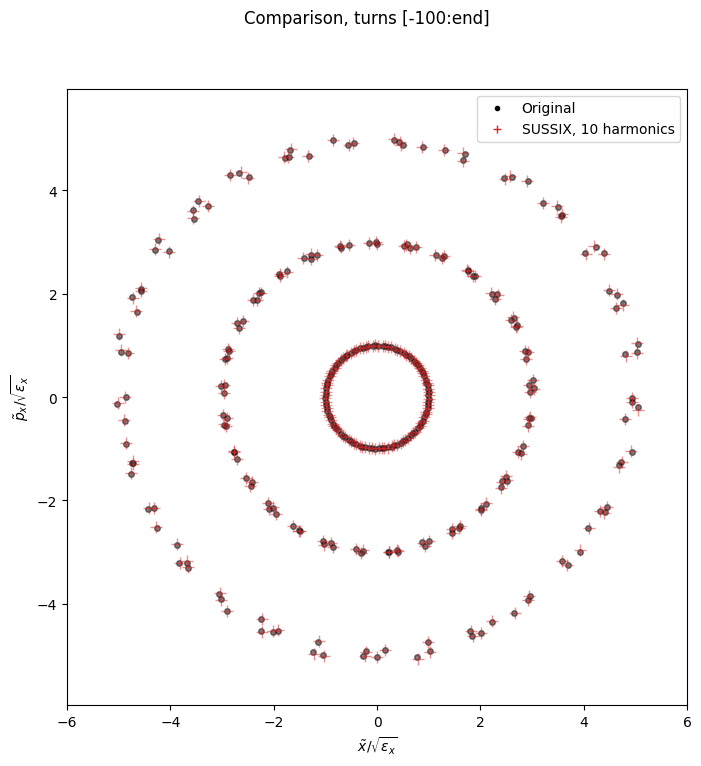

In [5]:
#-----------------------------
# PARAMETERS
n_harm = 10
nturns = 100
#-----------------------------

particles = particles_on_p

plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)
    x_r,px_r = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(part['x'][:nturns],part['px'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[:nturns],px_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-6,6)
plt.ylim(-6,6)


plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)
    x_r,px_r = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(part['x'][-nturns:],part['px'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[-nturns:],px_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-6,6)
plt.ylim(-6,6)



---
# Position ONLY analysis
---


Text(0, 0.5, '$\\tilde x/\\sqrt{\\varepsilon_x}$')

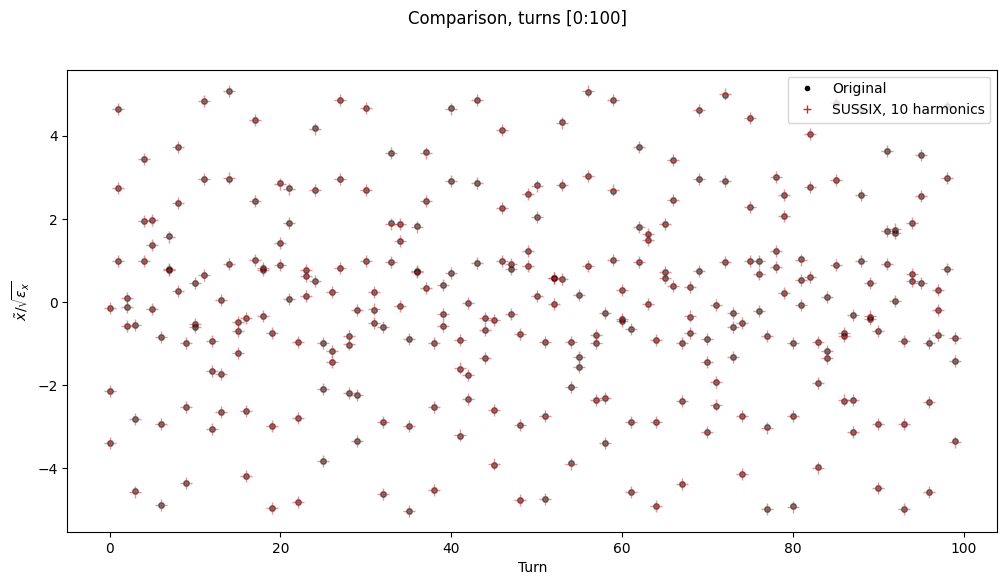

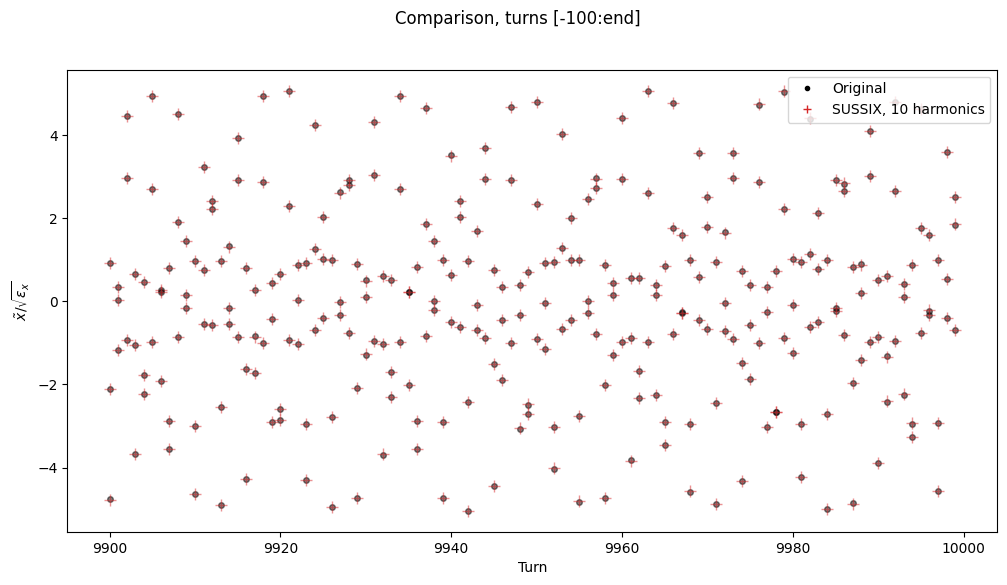

In [6]:
particles = particles_on_p

plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],number_of_harmonics = n_harm,Hann_order=2)
    x_r, _   = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(np.arange(0,nturns),part['x'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(0,nturns),x_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = sussix.get_spectrum(part['x'],number_of_harmonics = n_harm,Hann_order=2)
    x_r, _   = sussix.analysis.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(np.arange(int(1e4-nturns),int(1e4)),part['x'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(int(1e4-nturns),int(1e4)),x_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'SUSSIX, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


---
# Spectrum comparison
---

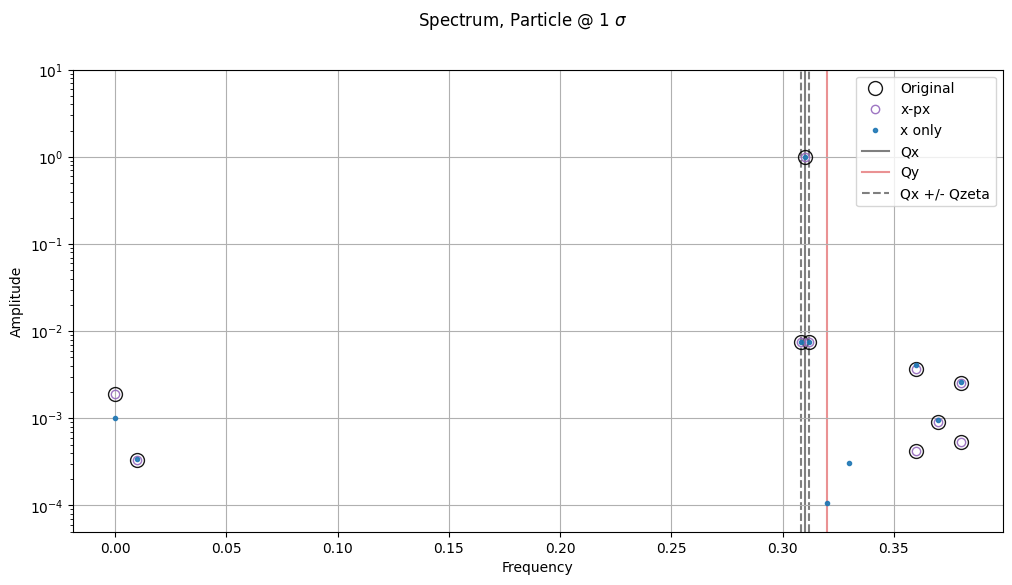

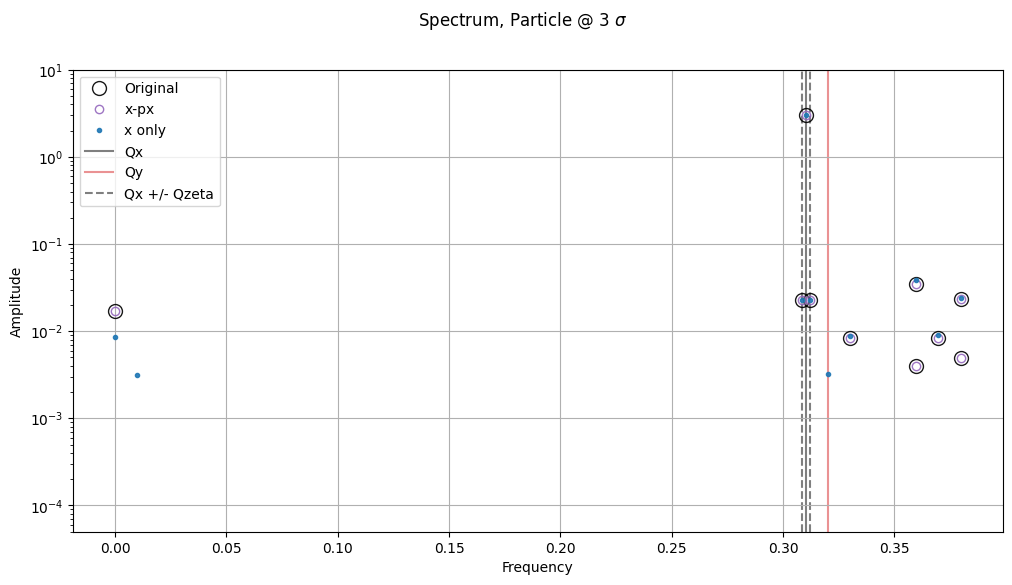

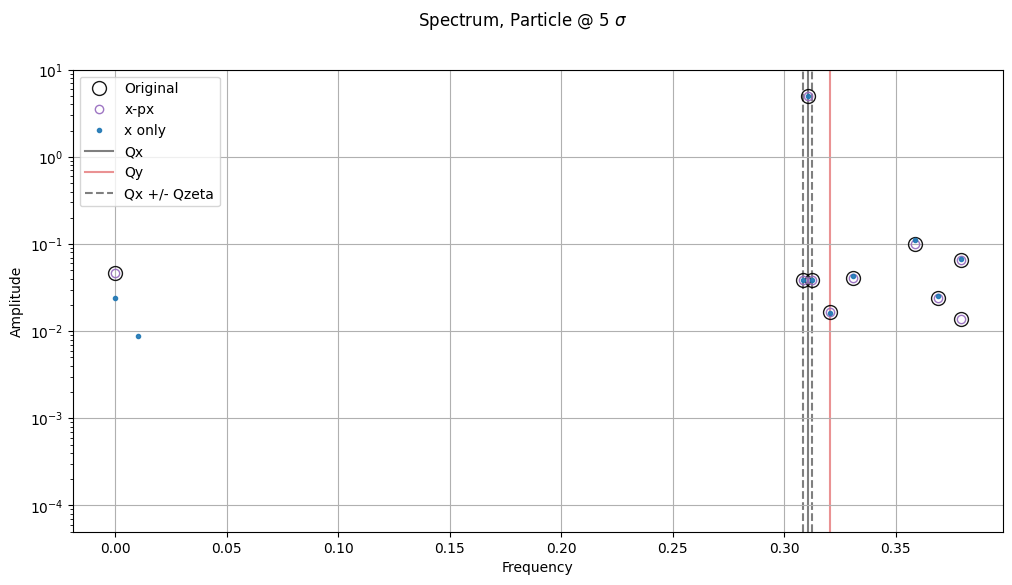

In [7]:
particles = particles_on_p
for part,sigma in zip(particles,[1,3,5]):
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Spectrum, Particle @ {sigma} $\sigma$')
    spectrum_x    = sussix.get_spectrum(part['x']           ,number_of_harmonics = n_harm,Hann_order=2)
    spectrum_x_px = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)

    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]

    plt.plot( np.abs(part['dfx'].frequency[:n_harm]),np.abs(part['dfx'].amplitude[:n_harm]),'o',ms=10,mfc='none',   color='black' ,alpha=0.9,label='Original')
    plt.plot( np.abs(spectrum_x_px.frequency),np.abs(spectrum_x_px.amplitude),'o',mfc='none',   color='C4' ,alpha=0.9,label='x-px')
    plt.plot( np.abs(spectrum_x.frequency)   ,np.abs(spectrum_x.amplitude),'.'   ,                    color='C0' ,alpha=0.9,label='x only')

    plt.axvline(fundamental_tunes[0],color='k',label='Qx',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[1],color='C3',label='Qy',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]+fundamental_tunes[2],ls='--',color='k',label='Qx +/- Qzeta',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]-fundamental_tunes[2],ls='--',color='k',zorder = -100,alpha=0.5)

    plt.legend()
    plt.yscale('log')
    plt.ylim(5e-5,1e1)
    plt.grid()
    plt.xlabel(rf'Frequency')
    plt.ylabel(rf'Amplitude')
    

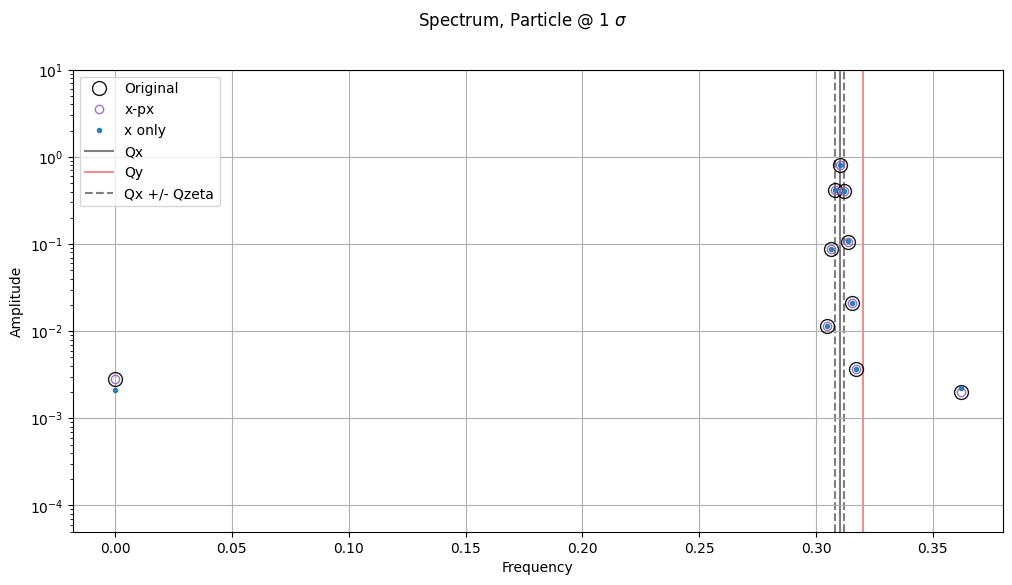

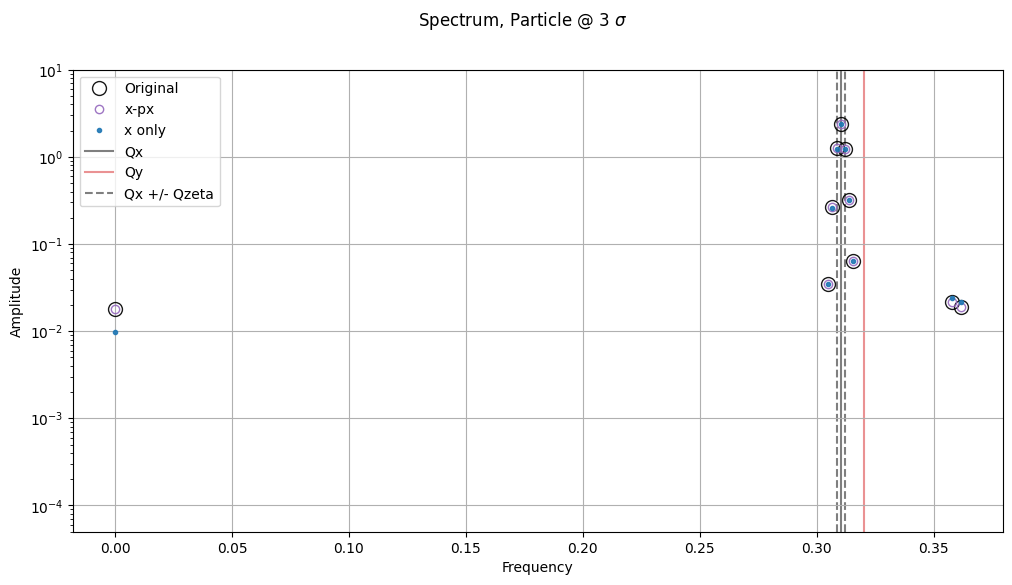

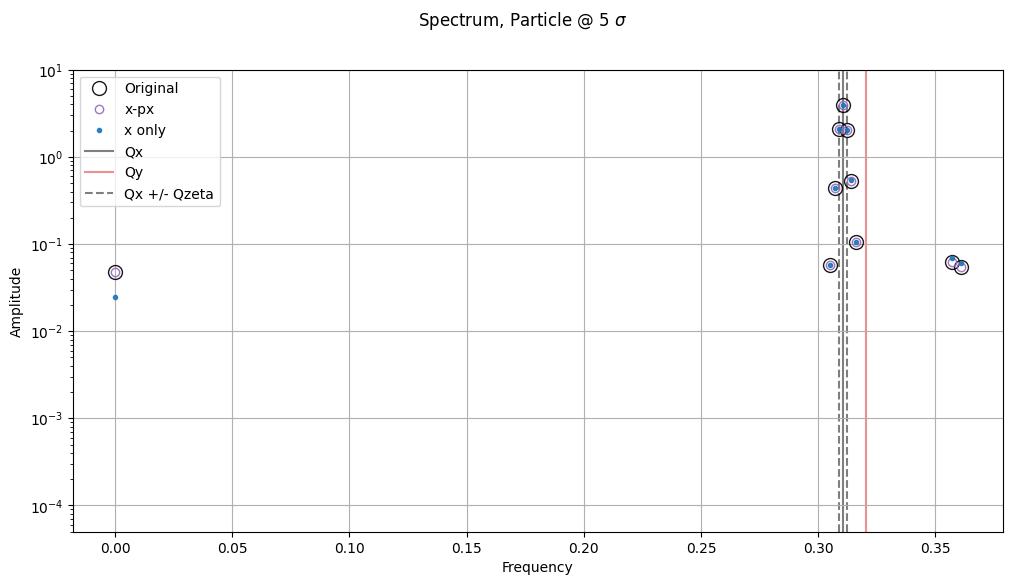

In [8]:
particles = particles_off_p
for part,sigma in zip(particles,[1,3,5]):
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Spectrum, Particle @ {sigma} $\sigma$')
    spectrum_x    = sussix.get_spectrum(part['x']           ,number_of_harmonics = n_harm,Hann_order=2)
    spectrum_x_px = sussix.get_spectrum(part['x'],part['px'],number_of_harmonics = n_harm,Hann_order=2)

    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]

    plt.plot( np.abs(part['dfx'].frequency[:n_harm]),np.abs(part['dfx'].amplitude[:n_harm]),'o',ms=10,mfc='none',   color='black' ,alpha=0.9,label='Original')
    plt.plot( np.abs(spectrum_x_px.frequency),np.abs(spectrum_x_px.amplitude),'o',mfc='none',   color='C4' ,alpha=0.9,label='x-px')
    plt.plot( np.abs(spectrum_x.frequency)   ,np.abs(spectrum_x.amplitude),'.'   ,                    color='C0' ,alpha=0.9,label='x only')

    plt.axvline(fundamental_tunes[0],color='k',label='Qx',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[1],color='C3',label='Qy',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]+fundamental_tunes[2],ls='--',color='k',label='Qx +/- Qzeta',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]-fundamental_tunes[2],ls='--',color='k',zorder = -100,alpha=0.5)

    plt.legend()
    plt.yscale('log')
    plt.ylim(5e-5,1e1)
    plt.grid()
    plt.xlabel(rf'Frequency')
    plt.ylabel(rf'Amplitude')
    

---
# Frequencies as linear combinations?
---

In [9]:
particles = particles_on_p

for part in particles:
    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]
    spectrum_x        = sussix.get_spectrum(part['x']           ,number_of_harmonics = n_harm,Hann_order=2)
    combination_jklm  = sussix.find_linear_combinations(spectrum_x.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
    display(combination_jklm)

,jklm,err,freq
0,"(1, 0, 0, 0)",8.326673e-16,0.310021
1,"(1, 0, 1, 0)",4.788447e-12,0.311887
2,"(1, 0, -1, 0)",1.497802e-12,0.308154
3,"(0, -2, 0, 1)",7.488454e-14,0.359959
4,"(-2, 0, 0, 1)",9.409140e-14,0.379958
5,"(0, 0, 0, 0)",0.000000e+00,0.000000
6,"(-1, -1, 0, 1)",9.547918e-14,0.369959
7,"(-1, 1, 0, 0)",1.471046e-15,0.010000
8,"(-1, 2, 0, 0)",3.843870e-12,0.330020
9,"(0, 1, 0, 0)",1.812439e-11,0.320020


,jklm,err,freq
0,"(1, 0, 0, 0)",8.881784e-16,0.310177
1,"(0, -2, 0, 1)",7.316370e-14,0.359595
2,"(-2, 0, 0, 1)",9.431345e-14,0.379646
3,"(1, 0, 1, 0)",4.436063e-12,0.312044
4,"(1, 0, -1, 0)",1.939837e-12,0.308311
5,"(0, 0, 0, 0)",0.000000e+00,0.000000
6,"(-1, -1, 0, 1)",6.533662e-14,0.369620
7,"(-1, 2, 0, 0)",1.026734e-12,0.330227
8,"(0, 1, 0, 0)",2.034317e-12,0.320202
9,"(-1, 1, 0, 0)",2.733924e-15,0.010025


,jklm,err,freq
0,"(1, 0, 0, 0)",2.220446e-15,0.310487
1,"(0, -2, 0, 1)",1.451228e-12,0.358844
2,"(-2, 0, 0, 1)",1.595468e-11,0.379027
3,"(0, 0, 0, 0)",0.000000e+00,0.000000
4,"(-1, 2, 0, 0)",8.754253e-11,0.330669
5,"(1, 0, 1, 0)",6.944187e-09,0.312353
6,"(1, 0, -1, 0)",3.491632e-09,0.308620
7,"(-1, -1, 0, 1)",1.324779e-11,0.368936
8,"(0, 1, 0, 0)",3.100631e-11,0.320578
9,"(-1, 1, 0, 0)",8.020546e-13,0.010091


In [10]:
particles = particles_off_p

for part in particles:
    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]
    spectrum_x        = sussix.get_spectrum(part['x']           ,number_of_harmonics = n_harm,Hann_order=2)
    combination_jklm  = sussix.find_linear_combinations(spectrum_x.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
    display(combination_jklm)

,jklm,err,freq
0,"(1, 0, 0, 0)",2.034484e-13,0.310105
1,"(1, 0, 1, 0)",5.032585e-12,0.311905
2,"(1, 0, -1, 0)",1.388140e-11,0.308305
3,"(1, 0, 2, 0)",2.177553e-11,0.313705
4,"(1, 0, -2, 0)",1.464484e-11,0.306505
5,"(1, 0, 3, 0)",1.353970e-10,0.315505
6,"(1, 0, -3, 0)",1.856126e-11,0.304705
7,"(0, 0, 0, 0)",0.000000e+00,0.000000
8,"(1, 0, 4, 0)",2.367635e-09,0.317305
9,"(0, -2, 1, 1)",2.759082e-10,0.361818


,jklm,err,freq
0,"(1, 0, 0, 0)",2.040035e-13,0.310262
1,"(1, 0, -1, 0)",2.996875e-11,0.308462
2,"(1, 0, 1, 0)",1.251438e-11,0.312062
3,"(1, 0, 2, 0)",3.256601e-11,0.313862
4,"(1, 0, -2, 0)",1.451378e-11,0.306661
5,"(1, 0, 3, 0)",3.073184e-10,0.315662
6,"(1, 0, -3, 0)",1.278688e-11,0.304861
7,"(0, -2, 1, 1)",2.819273e-11,0.361454
8,"(0, -2, -1, 1)",2.389738e-11,0.357853
9,"(0, 0, 0, 0)",0.000000e+00,0.000000


,jklm,err,freq
0,"(1, 0, 0, 0)",1.751377e-13,0.310571
1,"(1, 0, 1, 0)",4.033002e-11,0.312371
2,"(1, 0, -1, 0)",6.385448e-13,0.308771
3,"(1, 0, 2, 0)",3.409728e-11,0.314171
4,"(1, 0, -2, 0)",1.885534e-10,0.306971
5,"(1, 0, 3, 0)",1.012895e-09,0.315971
6,"(0, -2, -1, 1)",1.410213e-10,0.357099
7,"(0, -2, 1, 1)",5.265099e-10,0.360699
8,"(1, 0, -3, 0)",1.049589e-10,0.305171
9,"(0, 0, 0, 0)",0.000000e+00,0.000000


---
# Convergence
---

,amplitude,frequency
0,-0.143940-0.987097j,0.310021
1,0.001111+0.007397j,0.311887
2,-0.001048-0.007407j,0.308154
3,-0.001244-0.003440j,0.359959
4,-0.001266+0.002218j,0.379958
5,-0.001005-0.001590j,0.000000
6,0.000904+0.000019j,0.369959
7,-0.000477+0.000254j,-0.379958
8,-0.000190+0.000376j,-0.359959
9,0.000082+0.000320j,-0.010000


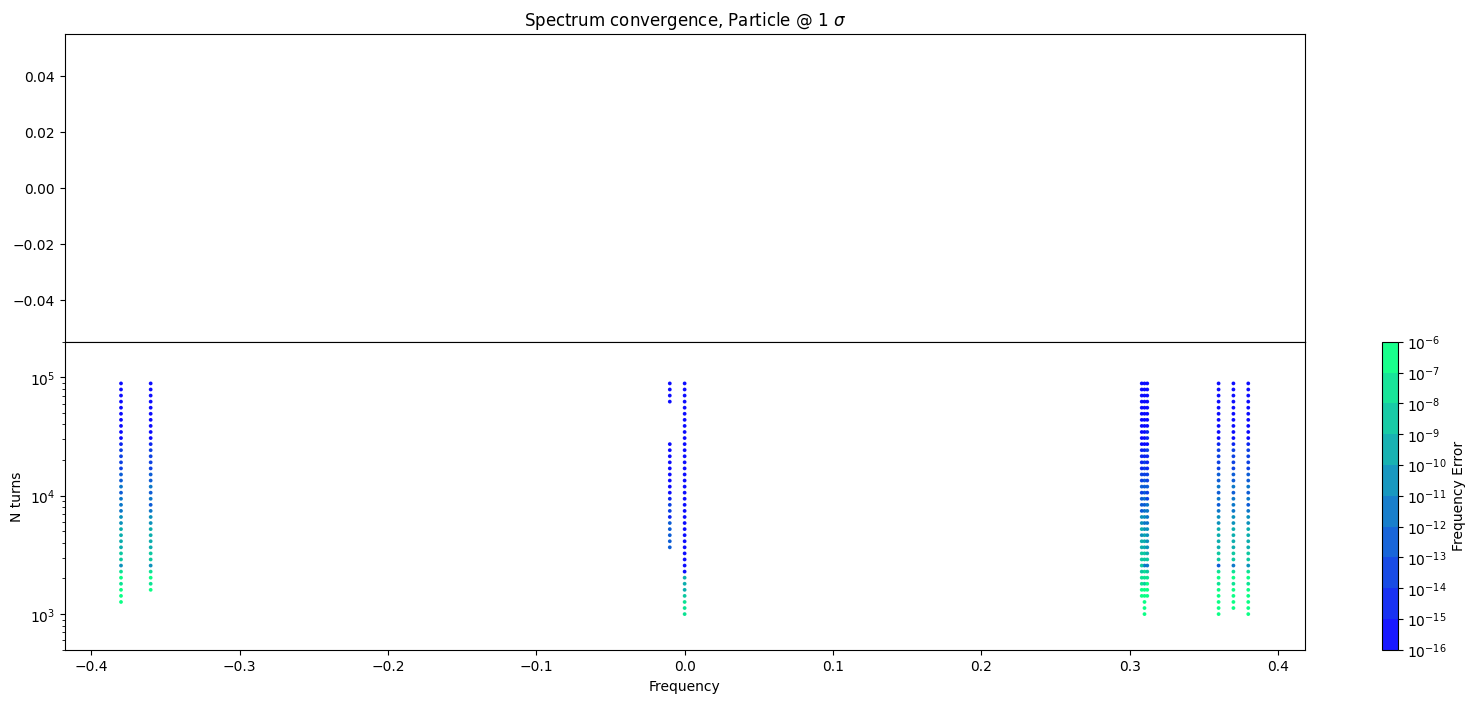

In [55]:

import matplotlib.colors as colors
vmin = 1e-16
vmax = 1e-6

# Since the signal is artificially generated from a sum of phasors, let's look beyond the nturn = 1e4 limit and see if we can find the expected frequencies.
plane     = 'x'
particles = particles_on_p

for part,sigma in zip(particles,[1]):

    x,px = sussix.generate_signal(part[f'df{plane}'].amplitude,part[f'df{plane}'].frequency,np.arange(int(1e5)))
    expected = part[f'df{plane}'][:10]
    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]

    # Trying to identify line based on jklm
    #---------------------------------------
    combination_jklm  = sussix.find_linear_combinations(expected.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
    if not len(combination_jklm.jklm.unique()) == n_harm:
        continue

    # setting jklm as index
    expected.insert(0,'jklm',combination_jklm.jklm)
    expected.set_index('jklm',inplace=True)
    #---------------------------------------

    N_vec = np.logspace(3,5,40).astype(int)

    results = []
    for N in N_vec:
        spectrum = sussix.get_spectrum( x[:N], px[:N], number_of_harmonics = len(expected),Hann_order = 2)

        # Trying to identify line based on jklm
        #---------------------------------------
        combination_jklm  = sussix.find_linear_combinations(spectrum.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
        if not len(combination_jklm.jklm.unique()) == n_harm:
            continue

        # setting jklm as index
        spectrum.insert(0,'jklm',combination_jklm.jklm)
        spectrum.set_index('jklm',inplace=True)
        #---------------------------------------

        # Computing error
        #---------------------------------------
        spectrum.insert(1,'Err:A',np.abs(spectrum.amplitude.abs() - expected.amplitude.abs()))
        spectrum.insert(2,'Err:Q',np.abs(spectrum.frequency - expected.frequency))
        spectrum.loc[spectrum['Err:Q']==0,'Err:Q'] = 1e-21
        #---------------------------------------

        results.append(spectrum)


    # PLOTTING
    fig, axs = plt.subplots(2, 1,figsize=(20,8))
    plt.subplots_adjust(hspace=0)
    axs[0].set_title(f'Spectrum convergence, Particle @ {sigma} $\sigma$')

    # Bottom plot
    #-----------------------------
    plt.sca(axs[1])
    bounds = np.array([1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6])
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    

    for N,spectrum in zip(N_vec,results):
        plt.scatter(spectrum.frequency,N*np.ones(len(spectrum)),c=spectrum['Err:Q'],s=3,alpha=0.9,norm=norm,cmap='winter')

    cbar = plt.colorbar(label='Frequency Error',ticks=bounds)
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(b))}}}$' for b in bounds]) 

    plt.yscale('log')
    plt.ylim(np.min(N_vec)/2,np.max(N_vec)*2)
    plt.xlabel('Frequency')
    plt.ylabel('N turns')
    #-----------------------------


    # Adding excluded points

    # # x_exc_template = np.linspace(expected.frequency.min()-4*dQ,expected.frequency.min()-dQ,len(expected))
    # # x_exec = np.array([list(x_exc_template[:len(expected)-row['excluded']]) + (row['excluded'])*[np.nan] for idx,row in df_exc.iterrows()])
    # # y_exec = np.array([len(expected)*[idx] for idx,row in df_exc.iterrows()])

    # # plt.plot(x_exec.flatten(),y_exec.flatten(),'o',ms=2,color='k',alpha=0.5)
    # # plt.axvline(x_exc_template.max(),color='k')
    # # plt.axvline(x_exc_template.min(),color='k')

    # plt.yscale('log')
    # # plt.xlim(expected.frequency.min()-5*dQ,expected.frequency.max()+dQ)
    # plt.xlabel('Frequency')
    # plt.ylabel('N turns')
    # # xticks = [x_exc_template.min(),x_exc_template.mean(),x_exc_template.max()] + list(np.linspace(Q0-15*dQ,Q0+15*dQ,11)) 
    # # plt.gca().set_xticks(xticks,['0','Found',str(len(expected))] + [f'{_x:.4f}' for _x in xticks[3:]]);


    plt.sca(axs[0])
    # plt.plot(expected.frequency,np.abs(expected.amplitude),'o',color='C4',alpha=1,mfc='none',label='EXPECTED')
    # plt.plot(results.frequency,np.abs(results.amplitude),'.',color='k',alpha=0.8,ms=3,label='SUSSIX')
    plt.scatter(np.nan,np.nan)
    cbar = plt.colorbar()
    cbar.ax.set_visible(False)
    plt.xticks([])

    # plt.yscale('log')
    # # plt.xlim(Q0-10*Qs,Q0+10*Qs)
    # plt.ylabel('Amplitude, Expected Spectrum')
    # # plt.xlim(expected.frequency.min()-5*dQ,expected.frequency.max()+dQ)
    # for line in expected.frequency:
    #     plt.axvline(line,color='k',alpha=0.1,zorder=-10)
    # plt.ylim(2e-6,1e2)

In [57]:
for spectrum in results:
    print(len(spectrum.dropna()))

4
5
6
8
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
10
10
10
10


In [62]:
results[-1]

,amplitude,Err:A,Err:Q,frequency
jklm,,,,
"(1, 0, 0, 0)",-0.143940-0.987097j,4.638512e-13,1.000000e-21,0.310021
"(1, 0, 1, 0)",0.001111+0.007397j,1.493770e-14,2.220446e-16,0.311887
"(1, 0, -1, 0)",-0.001048-0.007407j,1.693697e-14,1.000000e-21,0.308154
"(0, -2, 0, 1)",-0.001244-0.003440j,1.176576e-15,1.000000e-21,0.359959
"(-2, 0, 0, 1)",-0.001266+0.002218j,1.230353e-15,2.220446e-16,0.379958
"(0, 0, 0, 0)",-0.000975-0.001526j,7.067287e-05,1.000000e-21,0.000000
"(-1, -1, 0, 1)",0.000904+0.000019j,3.250438e-15,1.000000e-21,0.369959
"(2, 0, 0, -1)",-0.000477+0.000254j,6.106227e-16,2.220446e-16,-0.379958
"(0, 2, 0, -1)",-0.000190+0.000376j,1.041376e-16,1.000000e-21,-0.359959


In [58]:
results[-5]

,amplitude,Err:A,Err:Q,frequency
jklm,,,,
"(1, 0, 0, 0)",-0.143940-0.987097j,1.521450e-12,5.551115e-17,0.310021
"(1, 0, 1, 0)",0.001111+0.007397j,1.287859e-14,5.551115e-17,0.311887
"(1, 0, -1, 0)",-0.001048-0.007407j,1.168510e-14,1.000000e-21,0.308154
"(0, -2, 0, 1)",-0.001244-0.003440j,2.938622e-15,1.000000e-21,0.359959
"(-2, 0, 0, 1)",-0.001266+0.002218j,3.268653e-15,1.000000e-21,0.379958
"(0, 0, 0, 0)",-0.000972-0.001541j,5.914057e-05,1.000000e-21,0.000000
"(-1, -1, 0, 1)",0.000904+0.000019j,3.504684e-15,1.000000e-21,0.369959
"(2, 0, 0, -1)",-0.000477+0.000254j,7.420497e-15,5.551115e-17,-0.379958
"(0, 2, 0, -1)",-0.000190+0.000376j,1.015984e-14,1.665335e-16,-0.359959


True

In [35]:
for part,sigma in zip(particles,[1]):


    x,px = sussix.generate_signal(part[f'df{plane}'].amplitude,part[f'df{plane}'].frequency,np.arange(int(1e5)))
    expected = part[f'df{plane}'][:10]
    fundamental_tunes = [sussix.get_tune(part[f'{plane}'],part[f'p{plane}'],Hann_order=2) for plane in ['x','y','zeta']]

    # Trying to identify line based on jklm
    #---------------------------------------
    combination_jklm  = sussix.find_linear_combinations(expected.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
    if not len(combination_jklm.jklm.unique()) == n_harm:
        continue

    # setting jklm as index
    expected.insert(0,'jklm',combination_jklm.jklm)
    expected.set_index('jklm',inplace=True)
    #---------------------------------------

    N_vec = np.logspace(3,5,5).astype(int)
    freq_df = []
    err_df = []
    exc_df = []

    for N in N_vec:
        spectrum = sussix.get_spectrum( x[:N], px[:N], number_of_harmonics = len(expected),Hann_order = 2)

        # Trying to identify line based on jklm
        #---------------------------------------
        combination_jklm  = sussix.find_linear_combinations(spectrum.frequency,fundamental_tunes = fundamental_tunes,max_jklm = 10)
        if not len(combination_jklm.jklm.unique()) == n_harm:
            continue

        # setting jklm as index
        spectrum.insert(0,'jklm',combination_jklm.jklm)
        spectrum.set_index('jklm',inplace=True)
        #---------------------------------------

        # Computing error
        #---------------------------------------
        spectrum.insert(1,'Err:A',np.abs(spectrum.amplitude.abs() - expected.amplitude.abs()))
        spectrum.insert(2,'Err:Q',np.abs(spectrum.frequency - expected.frequency))
        spectrum.loc[spectrum['Err:Q']==0,'Err:Q'] = 1e-21
        #---------------------------------------

In [40]:
spectrum.insert(1,'Err:A',np.abs(spectrum.amplitude.abs() - expected.amplitude.abs()))
spectrum.insert(2,'Err:Q',np.abs(spectrum.frequency - expected.frequency))
spectrum.loc[spectrum['Err:Q']==0,'Err:Q'] = 1e-21

In [42]:
spectrum.loc[spectrum['Err:Q']==0,'Err:Q'] = 1e-21

In [43]:
spectrum

,amplitude,Err:A,Err:Q,frequency
jklm,,,,
"(1, 0, 0, 0)",-0.143940-0.987097j,4.638512e-13,1.000000e-21,0.310021
"(1, 0, 1, 0)",0.001111+0.007397j,1.493770e-14,2.220446e-16,0.311887
"(1, 0, -1, 0)",-0.001048-0.007407j,1.693697e-14,1.000000e-21,0.308154
"(0, -2, 0, 1)",-0.001244-0.003440j,1.176576e-15,1.000000e-21,0.359959
"(-2, 0, 0, 1)",-0.001266+0.002218j,1.230353e-15,2.220446e-16,0.379958
"(0, 0, 0, 0)",-0.000975-0.001526j,7.067287e-05,1.000000e-21,0.000000
"(-1, -1, 0, 1)",0.000904+0.000019j,3.250438e-15,1.000000e-21,0.369959
"(2, 0, 0, -1)",-0.000477+0.000254j,6.106227e-16,2.220446e-16,-0.379958
"(0, 2, 0, -1)",-0.000190+0.000376j,1.041376e-16,1.000000e-21,-0.359959


In [34]:
spectrum

,amplitude,frequency
jklm,,
"(1, 0, 0, 0)",-0.143940-0.987097j,0.310021
"(1, 0, 1, 0)",0.001111+0.007397j,0.311887
"(1, 0, -1, 0)",-0.001048-0.007407j,0.308154
"(0, -2, 0, 1)",-0.001244-0.003440j,0.359959
"(-2, 0, 0, 1)",-0.001266+0.002218j,0.379958
"(0, 0, 0, 0)",-0.000975-0.001526j,0.000000
"(-1, -1, 0, 1)",0.000904+0.000019j,0.369959
"(2, 0, 0, -1)",-0.000477+0.000254j,-0.379958
"(0, 2, 0, -1)",-0.000190+0.000376j,-0.359959


,amplitude,frequency
jklm,,
"(1, 0, 0, 0)",-0.143940-0.987097j,0.310021
"(1, 0, 1, 0)",0.001111+0.007397j,0.311887
"(1, 0, -1, 0)",-0.001048-0.007407j,0.308154
"(0, -2, 0, 1)",-0.001244-0.003440j,0.359959
"(-2, 0, 0, 1)",-0.001266+0.002218j,0.379958
"(0, 0, 0, 0)",-0.000975-0.001526j,0.000000
"(-1, -1, 0, 1)",0.000904+0.000019j,0.369959
"(2, 0, 0, -1)",-0.000477+0.000254j,-0.379958
"(0, 2, 0, -1)",-0.000190+0.000376j,-0.359959
